# Amazon fine food reviews dataset

## Converting text to vector using BOW

In [4]:
df_cleaned=pd.read_csv('cleaned_amazon_reviews.csv') #reading in data
df_cleaned=df_cleaned.dropna()

list_of_sentence=[] #list of sentence
for sentence in df_cleaned['CleanText'].values:
    li=sentence
    list_of_sentence.append(li)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
model=CountVectorizer(ngram_range=(1, 2)) #using BOW and 1 & 2 grams 
bow_review_matrix=model.fit_transform(list_of_sentence) #training our model

Text(0.5,1,'tsne plot for BOW using 1000 points')

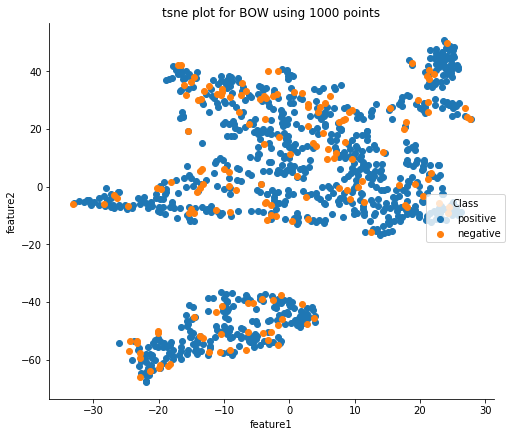

In [13]:
n=1000
tsvd_model = TruncatedSVD(n_components=5, n_iter=7, random_state=42) # using trucated_svd for dimensionality reduction on sparse matrices
tsvd_data=tsvd_model.fit_transform(bow_review_matrix[:n])

scaled_data=StandardScaler().fit_transform(np.array(tsvd_data)) # column standardization
model=TSNE(n_components=2,perplexity=30,n_iter=1000) #init. tsne model
tsne_data=model.fit_transform(scaled_data)
df=pd.DataFrame(tsne_data,columns=['feature1','feature2'])

df['Class']=df_cleaned['class'][:n]
# plt.figure(figsize=(6,9))
sns.FacetGrid(data=df,hue='Class',size=6).map(plt.scatter,'feature1','feature2').add_legend()
plt.tight_layout()
plt.title('tsne plot for BOW using {} points'.format(n))

Text(0.5,1,'tsne plot for BOW using 10000 points')

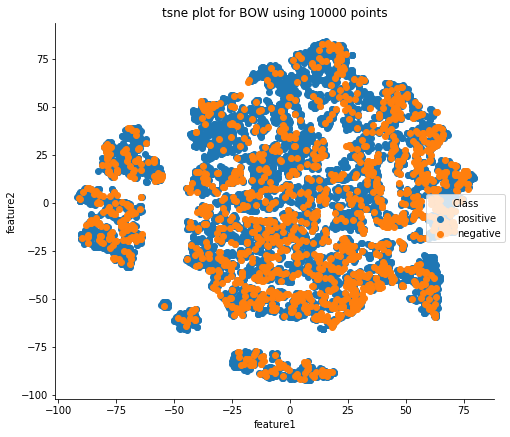

In [14]:
n=10000
tsvd_model = TruncatedSVD(n_components=5, n_iter=7, random_state=42) # using trucated_svd for dimensionality reduction on sparse matrices
tsvd_data=tsvd_model.fit_transform(bow_review_matrix[:n])

scaled_data=StandardScaler().fit_transform(np.array(tsvd_data)) # column standardization
model=TSNE(n_components=2,perplexity=30,n_iter=1000) #init. tsne model
tsne_data=model.fit_transform(scaled_data)
df=pd.DataFrame(tsne_data,columns=['feature1','feature2'])

df['Class']=df_cleaned['class'][:n]
# plt.figure(figsize=(6,9))
sns.FacetGrid(data=df,hue='Class',size=6).map(plt.scatter,'feature1','feature2').add_legend()
plt.tight_layout()
plt.title('tsne plot for BOW using {} points'.format(n))

Text(0.5,1,'tsne plot for BOW using 100000 points')

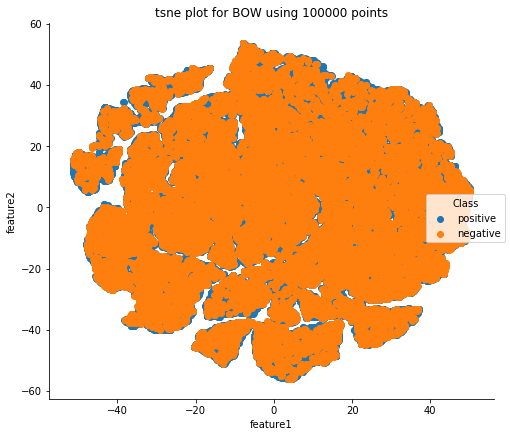

In [6]:
n=100000
tsvd_model = TruncatedSVD(n_components=5, n_iter=7, random_state=42) # using trucated_svd for dimensionality reduction on sparse matrices
tsvd_data=tsvd_model.fit_transform(bow_review_matrix[:n])

scaled_data=StandardScaler().fit_transform(np.array(tsvd_data)) # column standardization
model=TSNE(n_components=2,perplexity=30,n_iter=1000) #init. tsne model
tsne_data=model.fit_transform(scaled_data)
df=pd.DataFrame(tsne_data,columns=['feature1','feature2'])

df['Class']=df_cleaned['class'][:n]
# plt.figure(figsize=(6,9))
sns.FacetGrid(data=df,hue='Class',size=6).map(plt.scatter,'feature1','feature2').add_legend()
plt.tight_layout()
plt.title('tsne plot for BOW using {} points'.format(n))

## Converting text to vector using TF-IDF

In [13]:
df_cleaned=pd.read_csv('cleaned_amazon_reviews.csv') #reading in cleaned data
df_cleaned=df_cleaned.dropna()


In [15]:
list_of_sentence=[] # list of sentences 
for sentence in df_cleaned['CleanText'].values:
    list_of_sentence.append(sentence)
tfidf_model=TfidfVectorizer(ngram_range=(1,2))    
tfidf_review_matrix=tfidf_model.fit_transform(list_of_sentence) #training our tf-idf model


(328715, 3178748)

Text(0.5,1,'tsne plot for BOW using 100000 points')

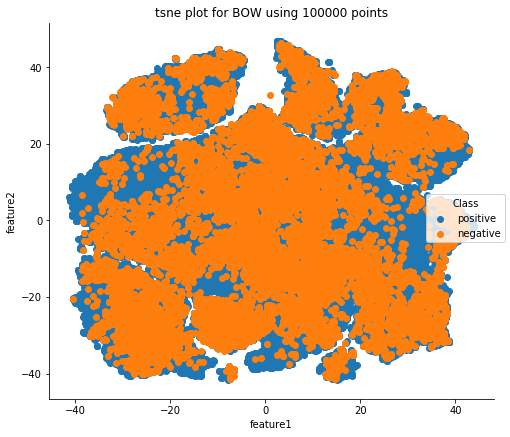

In [20]:
n=100000
tsvd_model = TruncatedSVD(n_components=10, n_iter=7, random_state=42) # using trucated_svd for dimensionality reduction on sparse matrices
tsvd_data=tsvd_model.fit_transform(tfidf_review_matrix[:n])
scaled_data=StandardScaler().fit_transform(tsvd_data) # column standardization
model=TSNE(n_components=2,perplexity=30,n_iter=1000) #init. tsne model
tsne_data=model.fit_transform(scaled_data)
df=pd.DataFrame(tsne_data,columns=['feature1','feature2'])
df['Class']=df_cleaned['class'][:n]
# plt.figure(figsize=(6,9))
sns.FacetGrid(data=df,hue='Class',size=6).map(plt.scatter,'feature1','feature2').add_legend()
plt.tight_layout()
plt.title('tsne plot for BOW using {} points'.format(n))

## Converting text to vector using Avg Word2Vec

In [ ]:
df_cleaned=pd.read_csv('cleaned_amazon_reviews.csv') #reading in clean data
df_cleaned=df_cleaned.dropna()

In [35]:
import gensim
sentence_list=[] # list for storing list of words
for sentence in df_cleaned['CleanText'].values:
    li=sentence.split()
    sentence_list.append(li)
w2v_model=gensim.models.Word2Vec(list_of_sentence,min_count=5,size=50) # training our word2vec model and note :list of sentences is list of list of words

In [67]:
words = list(w2v_model.wv.vocab)
print(len(words))

25931


In [81]:
def get_sentence_vec(list_of_sentence):
    vec_list=[]
    for sentence in list_of_sentence:
        vec=np.zeros(50)
        count=0
        for word in sentence:
            try:
                vec=vec+w2v_model.wv[word]
                count+=1
            except:
                continue
        vec=vec/count
        vec_list.append(vec)
    return vec_list

Text(0.5,1,'tsne plot for BOW using 100 points')

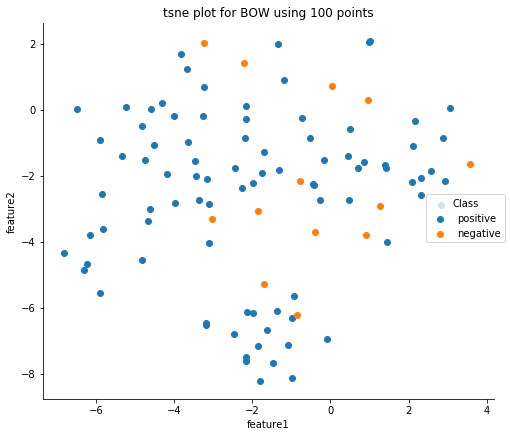

In [86]:
n=100
w2v_data=get_sentence_vec(list_of_sentence[:n]) # calculating sentence vector using Word2Vec
scaled_data=StandardScaler().fit_transform(np.array(w2v_data)) # column standardization
model=TSNE(n_components=2,perplexity=30,n_iter=1000) #init. tsne model
tsne_data=model.fit_transform(scaled_data)
df=pd.DataFrame(tsne_data,columns=['feature1','feature2'])
df['Class']=df_cleaned['class'][:n]
# plt.figure(figsize=(6,9))
sns.FacetGrid(data=df,hue='Class',size=6).map(plt.scatter,'feature1','feature2').add_legend()
plt.tight_layout()
plt.title('tsne plot for Word2Vec using {} points'.format(n))

Text(0.5,1,'tsne plot for Word2Vec using 1000 points')

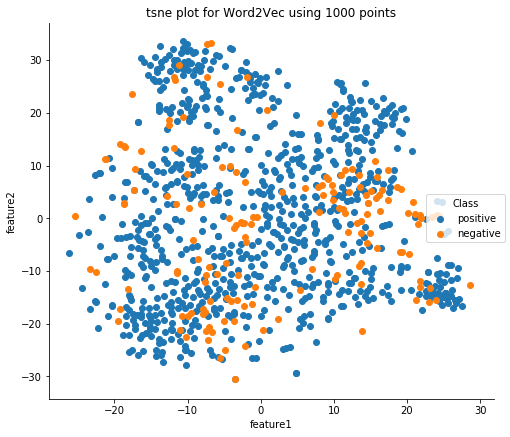

In [87]:
n=1000
w2v_data=get_sentence_vec(list_of_sentence[:n]) # calculating sentence vector using Word2Vec
scaled_data=StandardScaler().fit_transform(np.array(w2v_data)) # column standardization
model=TSNE(n_components=2,perplexity=30,n_iter=1000) #init. tsne model
tsne_data=model.fit_transform(scaled_data)
df=pd.DataFrame(tsne_data,columns=['feature1','feature2'])
df['Class']=df_cleaned['class'][:n]
# plt.figure(figsize=(6,9))
sns.FacetGrid(data=df,hue='Class',size=6).map(plt.scatter,'feature1','feature2').add_legend()
plt.tight_layout()
plt.title('tsne plot for Word2Vec using {} points'.format(n))

Text(0.5,1,'tsne plot for Word2Vec using 10000 points')

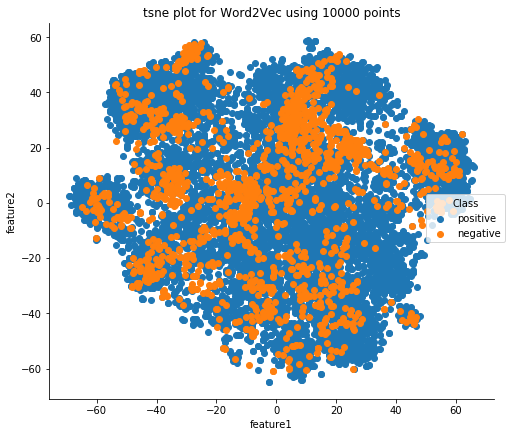

In [88]:
n=10000
w2v_data=get_sentence_vec(list_of_sentence[:n]) # calculating sentence vector using Word2Vec
scaled_data=StandardScaler().fit_transform(np.array(w2v_data)) # column standardization
model=TSNE(n_components=2,perplexity=30,n_iter=1000) #init. tsne model
tsne_data=model.fit_transform(scaled_data)
df=pd.DataFrame(tsne_data,columns=['feature1','feature2'])
df['Class']=df_cleaned['class'][:n]
# plt.figure(figsize=(6,9))
sns.FacetGrid(data=df,hue='Class',size=6).map(plt.scatter,'feature1','feature2').add_legend()
plt.tight_layout()
plt.title('tsne plot for Word2Vec using {} points'.format(n))

## Converting text to vector using wighted tf-idf word2vec

In [3]:
df_cleaned=pd.read_csv('cleaned_amazon_reviews.csv') #reading in clean data
df_cleaned=df_cleaned.dropna()

In [4]:
import gensim

list_of_sentence=[] #using cleaned text
for sentence in df_cleaned['CleanText'].values:
    list_of_sentence.append(sentence)

tfidf_model=TfidfVectorizer(ngram_range=(1,2))
tfidf_review_matrix=tfidf_model.fit_transform(list_of_sentence) #calculating tf-idf vectors


sentence_list=[] # list for storing list of words 
for sentence in df_cleaned['CleanText'].values:
    li=sentence.split()
    sentence_list.append(li)
w2v_model=gensim.models.Word2Vec(sentence_list,min_count=5,size=50) #training w2v model and note data should be list of list of words

In [5]:
def get_sentence_vec_tfidf(list_of_sentence):

    feature_name=tfidf_model.get_feature_names()
    di={ key:value for value,key in enumerate(tfidf_model.get_feature_names())}  #using dictionary to store feature name and index
    #it made our algo 
    vec_list=[]
    row=0
    for sentence in list_of_sentence:
        sent_vec=np.zeros(50)
        weighted_sum=0
        for word in sentence.split():
            
            try:
                tfidf_value=tfidf_review_matrix[row,di[word]]
                vec=w2v_model.wv[word]
                sent_vec=sent_vec+(vec*tfidf_value)
                weighted_sum+=tfidf_value
            except:
                continue
        sent_vec=sent_vec/weighted_sum
        vec_list.append(sent_vec)
        row+=1
    return vec_list

Text(0.5,1,'tsne plot for tf-idfWord2Vec using 1000 points')

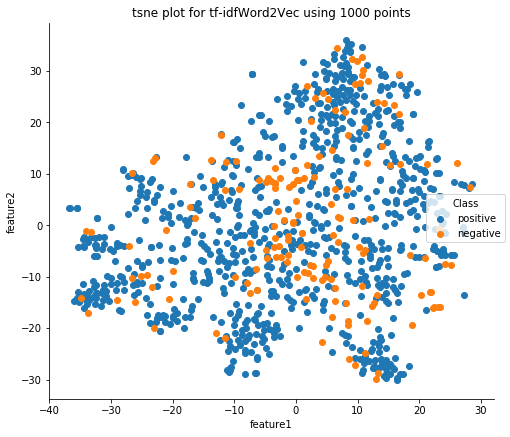

In [60]:
n=1000
tfidfw2v_data=get_sentence_vec_tfidf(list_of_sentence[:n]) # calculating sentence vector using Word2Vec
scaled_data=StandardScaler().fit_transform(np.array(tfidfw2v_data)) # column standardization
model=TSNE(n_components=2,perplexity=30,n_iter=1000) #init. tsne model
tsne_data=model.fit_transform(scaled_data)
df=pd.DataFrame(tsne_data,columns=['feature1','feature2'])
df['Class']=df_cleaned['class'][:n]
# plt.figure(figsize=(6,9))
sns.FacetGrid(data=df,hue='Class',size=6).map(plt.scatter,'feature1','feature2').add_legend()
plt.tight_layout()
plt.title('tsne plot for tf-idfWord2Vec using {} points'.format(n))

Text(0.5,1,'tsne plot for tf-idfWord2Vec using 3000 points')

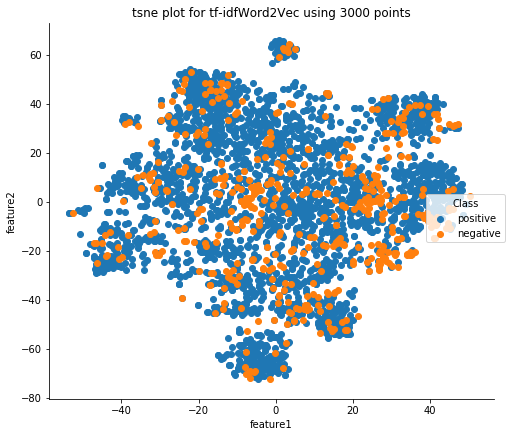

In [7]:
n=3000
tfidfw2v_data=get_sentence_vec_tfidf(list_of_sentence[:n]) # calculating sentence vector using Word2Vec
scaled_data=StandardScaler().fit_transform(np.array(tfidfw2v_data)) # column standardization
model=TSNE(n_components=2,perplexity=30,n_iter=1000) #init. tsne model
tsne_data=model.fit_transform(scaled_data)
df=pd.DataFrame(tsne_data,columns=['feature1','feature2'])
df['Class']=df_cleaned['class'][:n]
# plt.figure(figsize=(6,9))
sns.FacetGrid(data=df,hue='Class',size=6).map(plt.scatter,'feature1','feature2').add_legend()
plt.tight_layout()
plt.title('tsne plot for tf-idfWord2Vec using {} points'.format(n))

Text(0.5,1,'tsne plot for tf-idfWord2Vec using 10000 points')

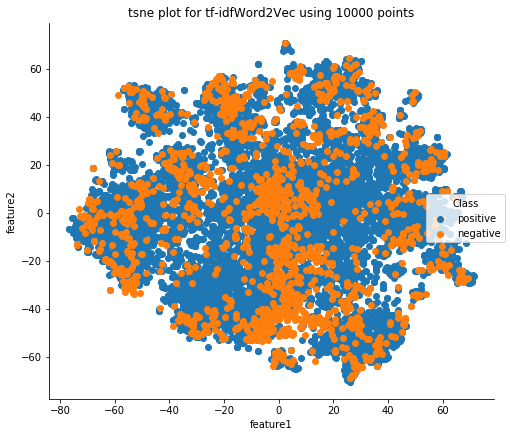

In [8]:
n=10000
tfidfw2v_data=get_sentence_vec_tfidf(list_of_sentence[:n]) # calculating sentence vector using Word2Vec
scaled_data=StandardScaler().fit_transform(np.array(tfidfw2v_data)) # column standardization
model=TSNE(n_components=2,perplexity=30,n_iter=1000) #init. tsne model
tsne_data=model.fit_transform(scaled_data)
df=pd.DataFrame(tsne_data,columns=['feature1','feature2'])
df['Class']=df_cleaned['class'][:n]
# plt.figure(figsize=(6,9))
sns.FacetGrid(data=df,hue='Class',size=6).map(plt.scatter,'feature1','feature2').add_legend()
plt.tight_layout()
plt.title('tsne plot for tf-idfWord2Vec using {} points'.format(n))

Text(0.5,1,'tsne plot for tf-idfWord2Vec using 100000 points')

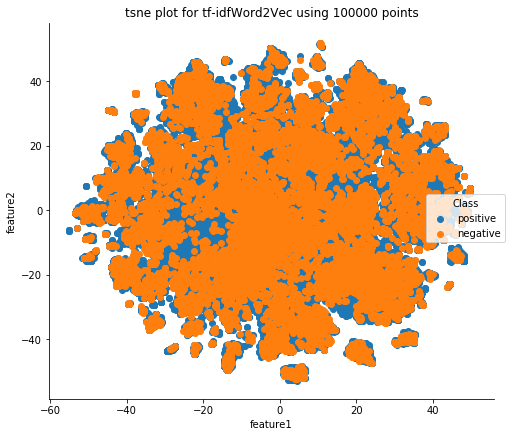

In [6]:
n=100000
tfidfw2v_data=get_sentence_vec_tfidf(list_of_sentence[:n]) # calculating sentence vector using Word2Vec
scaled_data=StandardScaler().fit_transform(np.array(tfidfw2v_data)) # column standardization
model=TSNE(n_components=2,perplexity=30,n_iter=1000) #init. tsne model
tsne_data=model.fit_transform(scaled_data)
df=pd.DataFrame(tsne_data,columns=['feature1','feature2'])
df['Class']=df_cleaned['class'][:n]
# plt.figure(figsize=(6,9))
sns.FacetGrid(data=df,hue='Class',size=6).map(plt.scatter,'feature1','feature2').add_legend()
plt.tight_layout()
plt.title('tsne plot for tf-idfWord2Vec using {} points'.format(n))